# sampint_comparisons

This notebook works with the data from sampint_distr.py, which selects the S2q distribution from kdsts in Run 8088
for various thresholds.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from krcal.map_builder.map_builder_functions  import e0_xy_correction
from invisible_cities.reco.corrections        import apply_all_correction_single_maps

In [2]:
thresholds = [(0,0), (0,2), (0,4), (0,6), (0,8), (0,10), (0,12), (0,14), (0,16), (0,18), (0,20),
             (1,0), (1,2), (1,4), (1,6), (1,8), (1,10), (1,12), (1,14), (1,16), (1,18), (1,20),
             (2,0), (2,2), (2,4), (2,6), (2,8), (2,10), (2,12), (2,14), (2,16), (2,18), (2,20),
             (3,0), (3,2), (3,4), (3,6), (3,8), (3,10), (3,12), (3,14), (3,16), (3,18), (3,20),
             (4,0), (4,2), (4,4), (4,6), (4,8), (4,10), (4,12), (4,14), (4,16), (4,18), (4,20)]

In [3]:
thresholds[11]

(1, 0)

In [4]:
# With noise
fit_range_wn = {(0, 0): [1800, 3000], (0, 2): [1000, 2000], (0, 4): [600, 1000], (0, 6): [500, 800],
 (0, 8): [500, 800], (0, 10): [450, 700], (0, 12): [450, 700], (0, 14): [450, 650], (0, 16): [400, 620],
 (0, 18): [400, 620], (0, 20): [380, 600], (1, 0): [780, 1050], (1, 2): [580, 850], (1, 4): [450, 700],
 (1, 6): [450, 700], (1, 8): [420, 650], (1, 10): [420, 650], (1, 12): [380, 600], (1, 14): [380, 600],
 (1, 16): [380, 600], (1, 18): [380, 600], (1, 20): [380, 600], (2, 0): [450, 780], (2, 2): [450, 780],
 (2, 4): [450, 780], (2, 6): [400, 780], (2, 8): [380, 650], (2, 10): [380, 650], (2, 12): [350, 600],
 (2, 14): [350, 600], (2, 16): [350, 600], (2, 18): [310, 590], (2, 20): [310, 580], (3, 0): [300, 580],
 (3, 2): [300, 580], (3, 4): [300, 580], (3, 6): [300, 580], (3, 8): [300, 580], (3, 10): [300, 580],
 (3, 12): [300, 580], (3, 14): [300, 580], (3, 16): [300, 580], (3, 18): [240, 580], (3, 20): [270, 570],
 (4, 0): [300, 580], (4, 2): [300, 580], (4, 4): [300, 580], (4, 6): [300, 580], (4, 8): [200, 550],
 (4, 10): [200, 550], (4, 12): [200, 550], (4, 14): [250, 550], (4, 16): [250, 540],
 (4, 18): [250, 530], (4, 20): [200, 520]}

In [5]:
# With noise
data_dir_wn = '/Users/taylorcontreras/Development/Research/nz_studies/data/data_10052023_wn/'
data_dir_nsub = '/Users/taylorcontreras/Development/Research/nz_studies/data/data_10052023_nsub/'
data_dir_wn_r20 = '/Users/taylorcontreras/Development/Research/nz_studies/data/data_10052023_wn_r20/'
data_dir_nsub_r20 = '/Users/taylorcontreras/Development/Research/nz_studies/data/data_10052023_nsub_r20/'
data_dir_wn_r20_z100 = '/Users/taylorcontreras/Development/Research/nz_studies/data/data_10052023_wn_r20_z100-550/'
data_dir_nsub_r20_z100 = '/Users/taylorcontreras/Development/Research/nz_studies/data/data_10052023_nsub_r20_z100-550/'
data_dir_wn_r20_z100_geo = '/Users/taylorcontreras/Development/Research/nz_studies/data/data_10052023_wn_r20_z100-550_geo/'
data_dir_nsub_r20_z100_geo = '/Users/taylorcontreras/Development/Research/nz_studies/data/data_10052023_nsub_r20_z100-550_geo/'


In [16]:
thresh = thresholds[11]
name = 'samp' + str(thresh[0]) + '_int'+str(thresh[1])
filename = '/Users/taylorcontreras/Development/Research/nz_studies/data/data_15052023/' #+name+'.out'
charge_nsub = np.loadtxt(filename + name + '_nsub.out', dtype=float)
charge_geo = np.loadtxt(filename + name + '_geo.out', dtype=float)
charge_lt = np.loadtxt(filename + name + '_lt.out', dtype=float)

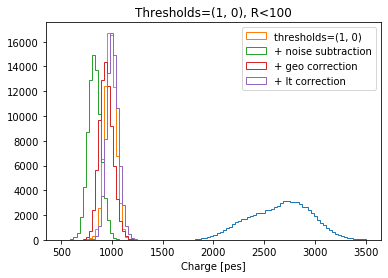

In [30]:
thresh = thresholds[11]
thresh = thresholds[11]
q_range = (500,3500)
bins = 100
rcut = 100
plt.hist(data_wn[(0,0)]['charge'], bins=bins, range=q_range, histtype='step')
plt.hist(data_wn[thresh]['charge'], bins=bins, range=q_range, label=f'thresholds={thresh}', histtype='step')
plt.hist(charge_nsub, bins=bins, range=q_range, label='+ noise subtraction', histtype='step')
plt.hist(charge_geo, bins=bins, range=q_range, label='+ geo correction', histtype='step')
plt.hist(charge_lt, bins=bins, range=q_range, label='+ lt correction', histtype='step')
plt.xlabel('Charge [pes]')
plt.legend()
plt.title(f'Thresholds={thresh}, R<{rcut}')
plt.show()

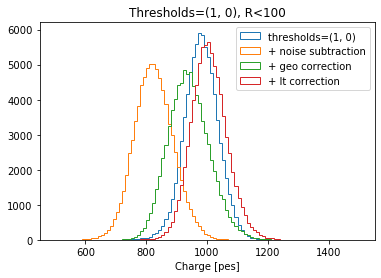

In [28]:
thresh = thresholds[11]
q_range = (500,1500)
bins = 100
rcut = 100
plt.hist(data_wn[thresh]['charge'], bins=bins, range=q_range, label=f'thresholds={thresh}', histtype='step')
plt.hist(charge_nsub, bins=bins, range=q_range, label='+ noise subtraction', histtype='step')
plt.hist(charge_geo, bins=bins, range=q_range, label='+ geo correction', histtype='step')
plt.hist(charge_lt, bins=bins, range=q_range, label='+ lt correction', histtype='step')
plt.xlabel('Charge [pes]')
plt.legend()
plt.title(f'Thresholds={thresh}, R<{rcut}')
plt.show()

In [31]:
thresh = thresholds[11]
name = 'samp' + str(thresh[0]) + '_int'+str(thresh[1])
filename = '/Users/taylorcontreras/Development/Research/nz_studies/data/data_15052023_rcut/' #+name+'.out'
charge_nsub_rcut = np.loadtxt(filename + name + '_nsub.out', dtype=float)
charge_geo_rcut = np.loadtxt(filename + name + '_geo.out', dtype=float)
charge_lt_rcut = np.loadtxt(filename + name + '_lt.out', dtype=float)

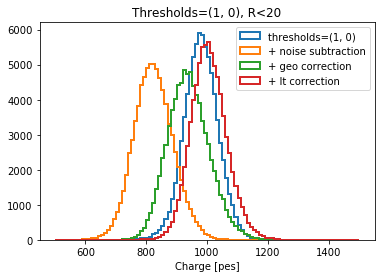

In [37]:
thresh = thresholds[11]
q_range = (500,1500)
bins = 100
rcut = 20
plt.hist(data_wn[thresh]['charge'], bins=bins, range=q_range, label=f'thresholds={thresh}', histtype='step', linewidth=2)
plt.hist(charge_nsub_rcut, bins=bins, range=q_range, label='+ noise subtraction', histtype='step', linewidth=2)
plt.hist(charge_geo_rcut, bins=bins, range=q_range, label='+ geo correction', histtype='step', linewidth=2)
plt.hist(charge_lt_rcut, bins=bins, range=q_range, label='+ lt correction', histtype='step', linewidth=2)
plt.xlabel('Charge [pes]')
plt.legend()
plt.title(f'Thresholds={thresh}, R<{rcut}')
plt.show()

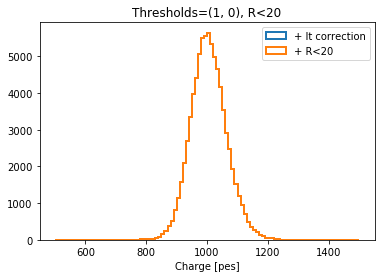

In [40]:
plt.hist(charge_lt_rcut, bins=bins, range=q_range, label='+ lt correction', histtype='step', linewidth=2)
plt.hist(charge_lt, bins=bins, range=q_range, label='+ R<20', histtype='step', linewidth=2)
plt.xlabel('Charge [pes]')
plt.legend()
plt.title(f'Thresholds={thresh}, R<{rcut}')
plt.show()

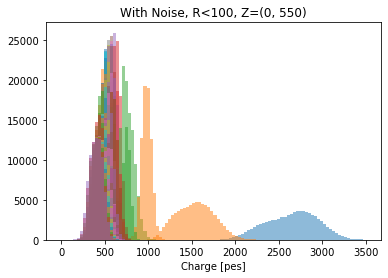

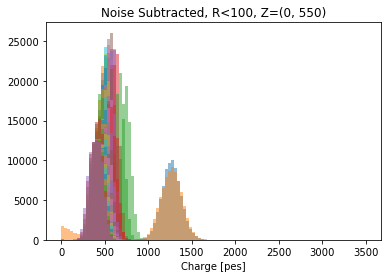

In [8]:
rcut = 100
zrange = (0,550)

data_wn = {}
for thresh in thresholds:
    name = 'samp' + str(thresh[0]) + '_int'+str(thresh[1])
    filename = data_dir_wn + name + '.out'
    charge = np.loadtxt(filename, dtype=float)
    data_wn[thresh] = {'charge':charge, 'fit_range':(charge.min(), charge.max()), 'plot_range':(charge.min(), charge.max())}
    plt.hist(charge, bins=100, range=(0,3500), alpha=0.5)
plt.xlabel('Charge [pes]')
plt.title('With Noise, R<'+str(rcut)+', Z='+str(zrange))
plt.show()

data_nsub = {}
for thresh in thresholds:
    name = 'samp' + str(thresh[0]) + '_int'+str(thresh[1])
    filename = data_dir_nsub + name + '.out'
    charge = np.loadtxt(filename, dtype=float)
    data_nsub[thresh] = {'charge':charge, 'fit_range':(charge.min(), charge.max()), 'plot_range':(charge.min(), charge.max())}
    plt.hist(charge, bins=100, range=(0,3500), alpha=0.5)
plt.xlabel('Charge [pes]')
plt.title('Noise Subtracted, R<'+str(rcut)+', Z='+str(zrange))
plt.show()

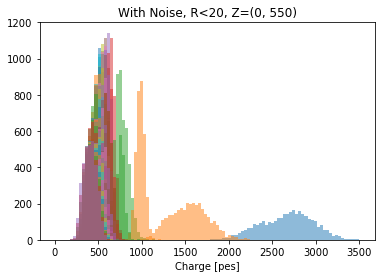

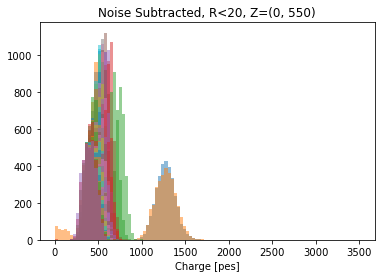

In [12]:
rcut = 20
zrange = (0,550)

data_wn_r20 = {}
for thresh in thresholds:
    name = 'samp' + str(thresh[0]) + '_int'+str(thresh[1])
    filename = data_dir_wn_r20 + name + '.out'
    charge = np.loadtxt(filename, dtype=float)
    data_wn_r20[thresh] = {'charge':charge, 'fit_range':(charge.min(), charge.max()), 'plot_range':(charge.min(), charge.max())}
    plt.hist(charge, bins=100, range=(0,3500), alpha=0.5)
plt.xlabel('Charge [pes]')
plt.title('With Noise, R<'+str(rcut)+', Z='+str(zrange))
plt.show()

data_nsub_r20 = {}
for thresh in thresholds:
    name = 'samp' + str(thresh[0]) + '_int'+str(thresh[1])
    filename = data_dir_nsub_r20 + name + '.out'
    charge = np.loadtxt(filename, dtype=float)
    data_nsub_r20[thresh] = {'charge':charge, 'fit_range':(charge.min(), charge.max()), 'plot_range':(charge.min(), charge.max())}
    plt.hist(charge, bins=100, range=(0,3500), alpha=0.5)
plt.xlabel('Charge [pes]')
plt.title('Noise Subtracted, R<'+str(rcut)+', Z='+str(zrange))
plt.show()

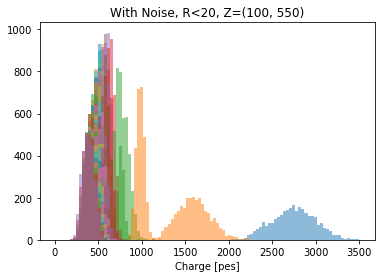

/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: loadtxt: Empty input file: "/Users/taylorcontreras/Development/Research/nz_studies/data/data_10052023_nsub_r20_z100-550/samp2_int0.out"
/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: loadtxt: Empty input file: "/Users/taylorcontreras/Development/Research/nz_studies/data/data_10052023_nsub_r20_z100-550/samp3_int0.out"
/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: loadtxt: Empty input file: "/Users/taylorcontreras/Development/Research/nz_studies/data/data_10052023_nsub_r20_z100-550/samp4_int0.out"


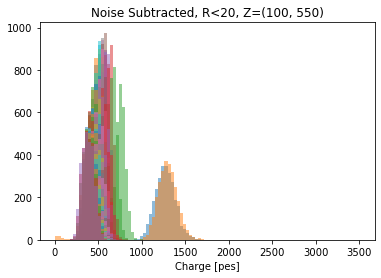

In [13]:
rcut = 20
zrange = (100,550)

data_wn_r20_z100 = {}
for thresh in thresholds:
    name = 'samp' + str(thresh[0]) + '_int'+str(thresh[1])
    filename = data_dir_wn_r20_z100 + name + '.out'
    charge = np.loadtxt(filename, dtype=float)
    data_wn_r20_z100[thresh] = {'charge':charge, 'fit_range':(charge.min(), charge.max()), 'plot_range':(charge.min(), charge.max())}
    plt.hist(charge, bins=100, range=(0,3500), alpha=0.5)
plt.xlabel('Charge [pes]')
plt.title('With Noise, R<'+str(rcut)+', Z='+str(zrange))
plt.show()

data_nsub_r20_z100 = {}
for thresh in thresholds:
    name = 'samp' + str(thresh[0]) + '_int'+str(thresh[1])
    filename = data_dir_nsub_r20_z100 + name + '.out'
    charge = np.loadtxt(filename, dtype=float)
    if charge.size == 0:
         data_nsub_r20_z100[thresh] = {'charge':None, 'fit_range':(0,0), 'plot_range':(0,0)}
    else:
        data_nsub_r20_z100[thresh] = {'charge':charge, 'fit_range':(charge.min(), charge.max()), 'plot_range':(charge.min(), charge.max())}
    plt.hist(charge, bins=100, range=(0,3500), alpha=0.5)
plt.xlabel('Charge [pes]')
plt.title('Noise Subtracted, R<'+str(rcut)+', Z='+str(zrange))
plt.show()

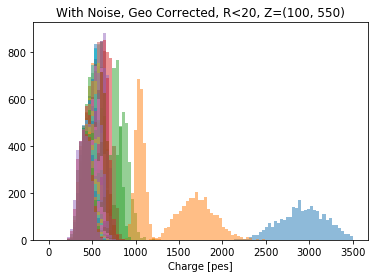

/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: loadtxt: Empty input file: "/Users/taylorcontreras/Development/Research/nz_studies/data/data_10052023_nsub_r20_z100-550_geo/samp2_int0.out"
/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: loadtxt: Empty input file: "/Users/taylorcontreras/Development/Research/nz_studies/data/data_10052023_nsub_r20_z100-550_geo/samp3_int0.out"
/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: loadtxt: Empty input file: "/Users/taylorcontreras/Development/Research/nz_studies/data/data_10052023_nsub_r20_z100-550_geo/samp4_int0.out"


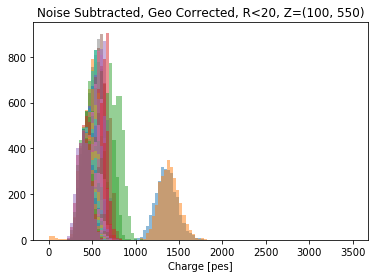

In [14]:
rcut = 20
zrange = (100,550)

data_wn_r20_z100_geo = {}
for thresh in thresholds:
    name = 'samp' + str(thresh[0]) + '_int'+str(thresh[1])
    filename = data_dir_wn_r20_z100_geo + name + '.out'
    charge = np.loadtxt(filename, dtype=float)
    data_wn_r20_z100_geo[thresh] = {'charge':charge, 'fit_range':(charge.min(), charge.max()), 'plot_range':(charge.min(), charge.max())}
    plt.hist(charge, bins=100, range=(0,3500), alpha=0.5)
plt.xlabel('Charge [pes]')
plt.title('With Noise, Geo Corrected, R<'+str(rcut)+', Z='+str(zrange))
plt.show()

data_nsub_r20_z100_geo = {}
for thresh in thresholds:
    name = 'samp' + str(thresh[0]) + '_int'+str(thresh[1])
    filename = data_dir_nsub_r20_z100_geo + name + '.out'
    charge = np.loadtxt(filename, dtype=float)
    if charge.size == 0:
         data_nsub_r20_z100_geo[thresh] = {'charge':None, 'fit_range':(0,0), 'plot_range':(0,0)}
    else:
        data_nsub_r20_z100_geo[thresh] = {'charge':charge, 'fit_range':(charge.min(), charge.max()), 'plot_range':(charge.min(), charge.max())}
    plt.hist(charge, bins=100, range=(0,3500), alpha=0.5)
plt.xlabel('Charge [pes]')
plt.title('Noise Subtracted, Geo Corrected, R<'+str(rcut)+', Z='+str(zrange))
plt.show()

In [337]:
# Save the new fit ranges
for thresh in data.keys():
    data[thresh]['fit_range'] = fit_range[thresh]

### Fit functions

In [17]:
from dataclasses import dataclass
from typing      import Tuple
from typing      import TypeVar
from typing      import Callable
from collections import namedtuple
from scipy.optimize          import OptimizeWarning
import warnings

from invisible_cities.core.core_functions  import shift_to_bin_centers
from invisible_cities.core                 import fit_functions as fitf
from invisible_cities.evm  .ic_containers import FitFunction
from   invisible_cities.core.core_functions    import in_range
from   invisible_cities.core .stat_functions import poisson_sigma
from matplotlib.ticker import AutoMinorLocator
from matplotlib.offsetbox import AnchoredText

Measurement = namedtuple('Measurement', 'value uncertainty')
Number = TypeVar('Number', None, int, float)
NN = np.nan

@dataclass
class HistoPar:
    var    : np.array
    nbins  : int
    range  : Tuple[float]
        
@dataclass
class GaussPar:
    mu    : Measurement
    std   : Measurement
    amp   : Measurement
        
@dataclass
class ProfilePar:
    x  : np.array
    y  : np.array
    xu : np.array
    yu : np.array
        
@dataclass
class FitPar(ProfilePar):
    f     : FitFunction
        
@dataclass
class FitResult:
    par   : np.array
    err   : np.array
    chi2  : float
    valid : bool
        
@dataclass
class FitCollection:
    fp   : FitPar
    hp   : HistoPar
    fr   : FitResult
        
def gaussian_parameters(x : np.array, range : Tuple[Number], bin_size : float = 1)->GaussPar:
    """
    Return the parameters defining a Gaussian
    g = N * exp(x - mu)**2 / (2 * std**2)
    where N is the normalization: N = 1 / (sqrt(2 * np.pi) * std)
    The parameters returned are the mean (mu), standard deviation (std)
    and the amplitude (inverse of N).
    """
    mu, std = mean_and_std(x, range)
    ff     = np.sqrt(2 * np.pi) * std

    amp     = len(x) * bin_size / ff

    sel  = in_range(x, *range)
    N = len(x[sel])              # number of samples in range
    mu_u  = std / np.sqrt(N)
    std_u = std / np.sqrt(2 * (N -1))
    amp_u = np.sqrt(2 * np.pi) * std_u

    return GaussPar(mu  = Measurement(mu, mu_u),
                    std = Measurement(std, std_u),
                    amp = Measurement(amp, amp_u))

def gaussian_fit(x       : np.array,
                 y       : np.array,
                 seed    : GaussPar,
                 n_sigma : int)  ->Tuple[FitPar, FitResult]:
    """Gaussian fit to x,y variables, with fit range defined by n_sigma"""

    mu  = seed.mu.value
    std = seed.std.value
    amp = seed.amp.value
    fit_range = mu - n_sigma * std, mu + n_sigma * std

    x, y      = x[in_range(x, *fit_range)], y[in_range(x, *fit_range)]
    yu        = poisson_sigma(y)
    fseed     = (amp, mu, std)

    par, err = par_and_err_from_seed(seed)
    fr = FitResult(par = par,
                   err = err,
                   chi2 = NN,
                   valid = False)
    fp = None

    with warnings.catch_warnings():
        warnings.filterwarnings('error')  # in order to handle fit failures here
        try:
            fp, fr = gfit(x, y, yu, fseed)
        except RuntimeWarning:   # this is the most usual failure, and usually solved trying fitx
                                 # with a different seed
            print(f' fit failed for seed  = {seed}, due to RunTimeWarning, retry fit ')
            fseed = (10*fseed[0], fseed[1], fseed[2] )
            try:
                fp, fr = gfit(x, y, yu, fseed)
            except RuntimeWarning: #  Give up on second failure
                print(f' fit failed for seed  = {seed}, due to RunTimeWarning, give up ')
        except OptimizeWarning:
            print(f' OptimizeWarning was raised for seed  = {seed} due to OptimizeWarning')
        except RuntimeError:
            print(f' fit failed for seed  = {seed}  due to RunTimeError')
        except TypeError:
            print(f' fit failed for seed  = {seed}  due to TypeError')

    return fp, fr

def fit_energy(e : np.array,
               nbins   : int,
               range   : Tuple[float],
               n_sigma : float = 3.0)->FitCollection:
    """
    Takes an "energy vector" (e.g, 1d array), with number of bins enbins and range erange, then:
        1. Computes the histogram of e with enbins in erange. This returns an array of bin
        edges (b), and bin contents (y). The array (b) is shifted to bin centers (x)
        2. The arrays x and y are fitted to a gaussian, in a range given by an interval
        arround the estimation of the maximum of the gaussian. The interval size is estimated
        by multiplying n_sigma by the estimation of the gaussian std.
    The result of the fit is a fit collection, that includes a FitPar and a HistoPar objects
    needed for printing and plotting the fit result.
       """

    y, b = np.histogram(e, bins= nbins, range=range)
    x = shift_to_bin_centers(b)
    bin_size = (range[1] - range[0]) / nbins
    seed = gaussian_parameters(e, range, bin_size)

    fp, fr = gaussian_fit(x, y, seed, n_sigma)

    hp = HistoPar(var      = e,
                  nbins    = nbins,
                  range    = range)

    return FitCollection(fp = fp, hp = hp, fr = fr)

def mean_and_std(x : np.array, range_ : Tuple[Number, Number])->Tuple[Number, Number]:
    """Computes mean and std for an array within a range: takes into account nans"""

    mu  = NN
    std = NN

    if all(np.isnan(x)):  # all elements are nan
        mu  = NN
        std = NN
    else:
        x_nonnan = x[np.isfinite(x)]
        y = x_nonnan[in_range(x_nonnan, *range_)]
        if len(y) == 0:
            warnings.warn(f'warning, empty slice of x = {x} in range = {range_}')
            mu  = NN
            std = NN
        else:
            mu  = np.mean(y)
            std = np.std(y)

    return mu, std

def par_and_err_from_seed(seed : GaussPar) ->Tuple[np.array, np.array]:
    par = np.zeros(3)
    err = np.zeros(3)
    par[0] = seed.amp.value
    par[1] = seed.mu.value
    par[2] = seed.std.value
    err[0] = seed.amp.uncertainty
    err[1] = seed.mu.uncertainty
    err[2] = seed.std.uncertainty
    return par, err

def gfit(x     : np.array,
         y     : np.array,
         yu    : np.array,
         fseed : Tuple[float, float, float]) ->Tuple[FitPar, FitResult]:

    f     = fitf.fit(fitf.gauss, x, y, fseed, sigma=yu)
    c2    = chi2(f, x, y, yu)
    par  = np.array(f.values)
    err  = np.array(f.errors)
    xu   = np.diff(x) * 0.5

    fr = FitResult(par = par,
                   err = err,
                   chi2 = c2,
                   valid = True)
    fp = FitPar(x  = x, y  = y, xu = xu, yu = yu, f  = f.fn)

    return fp, fr

def chi2f(f   : Callable,
          nfp : int,        # number of function parameters
          x   : np.array,
          y   : np.array,
          yu  : np.array)->float:
    """
    Computes the chi2 of a function f applied over array x and compared
    with array y with error yu
    """

    assert len(x) == len(y) == len(yu)
    fitx  = f(x)
    chi2_ = np.sum(((y - fitx) / yu)**2)

    if len(x) > nfp:
        return chi2_/(len(x)-nfp)
    else:
        warnings.warn('nof = 0 in chi2 calculation, return chi2 = {chi2_}', UserWarning)
        return chi2_


def chi2(f : FitFunction,
         x : np.array,
         y : np.array,
         sy: np.array)->float:
    """
    Computes the chi2 of a function f applied over array x and compared
    with array y with error yu. The object f is of type FitFunction.
    """
    return chi2f(f.fn, len(f.values), x, y, sy)

def plot_fit_energy(fc : FitCollection):

    if fc.fr.valid:
        par  = fc.fr.par
        x    = fc.hp.var
        r    = 2.35 * 100 *  par[2] / par[1]
        entries  =  f'Entries = {len(x)}'
        mean     =  r'$\mu$ = {:7.2f}'.format(par[1])
        sigma    =  r'$\sigma$ = {:7.2f}'.format(par[2])
        rx       =  r'$\sigma/mu$ (FWHM)  = {:7.2f}'.format(r)
        stat     =  f'{entries}\n{mean}\n{sigma}\n{rx}'

        f, ax = plt.subplots(1,1)
        ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
        ax.tick_params(axis='both', direction='in', reset=True, labelsize=15, which='both')
        ax.tick_params(which='major', length=7)
        ax.tick_params(which='minor', length=4)
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        _, _, _   = plt.hist(fc.hp.var,
                             bins = fc.hp.nbins,
                             range=fc.hp.range,
                             histtype='step',
                             edgecolor='black',
                             linewidth=1.5,
                             label=stat)

        plt.plot(fc.fp.x, fc.fp.f(fc.fp.x), "r-", lw=4)
        anchored_text = AnchoredText(stat, loc=2)
        ax.add_artist(anchored_text)
    else:
        warnings.warn(f' fit did not succeed, cannot plot ', UserWarning)


def print_fit_energy(fc : FitCollection):

    par  = fc.fr.par
    err  = fc.fr.err
    try:
        r  = 2.35 * 100 *  par[2] / par[1]
        fe = np.sqrt(41 / 2458) * r
        print(f'  Fit was valid = {fc.fr.valid}')
        print(f' Emu       = {par[1]} +-{err[1]} ')
        print(f' E sigma   = {par[2]} +-{err[2]} ')
        print(f' chi2    = {fc.fr.chi2} ')

        print(f' sigma E/E (FWHM)     (%) ={r}')
        print(f' sigma E/E (FWHM) Qbb (%) ={fe} ')
    except ZeroDivisionError:
        warnings.warn(f' mu  = {par[1]} ', UserWarning)

def eres_err(fc : FitCollection):
    
    par  = fc.fr.par
    err  = fc.fr.err
    r  = 2.35 * 100 *  par[2] / par[1]
    r_qbb = np.sqrt(41 / 2458) * r
    err = (2.35*100/par[1])*np.sqrt(err[2]**2. + (par[2]**2. / par[1]**2.)*err[2]**2.)
    return r, err, r_qbb, par[2], par[1]


In [18]:
import scipy.stats as stats

def Gaussian(mu, sigma, this_range=None):

    if this_range == None:
        this_range = (mu - 3*sigma, mu + 3*sigma)

    x = np.linspace(this_range[0], this_range[1], 100)
    y = stats.norm.pdf(x, mu, sigma)
    return x, y

def eres_from_fit(fc : FitCollection):
    
    if fc.fr.valid:
        par  = fc.fr.par
        x    = fc.hp.var
        r    = 2.35 * 100 *  par[2] / par[1]
        
        if r > 0:
            return r
        else:
            return None
    else:
        return None

def plot_fit_energy2(fc : FitCollection, data, plot_range, color='red'):

    if fc.fr.valid:
        par  = fc.fr.par
        x    = fc.hp.var
        r    = 2.35 * 100 *  par[2] / par[1]
        entries  =  f'Entries = {len(x)}'
        mean     =  r'$\mu$ = {:7.2f}'.format(par[1])
        sigma    =  r'$\sigma$ = {:7.2f}'.format(par[2])
        rx       =  r'Eres (FWHM) % = {:7.2f}'.format(r)
        chi2     =  r'$\chi^2$ = {:7.2f}'.format(fc.fr.chi2)
        stat     =  f'{entries}\n{mean}\n{sigma}\n{chi2}\n{rx}'

        f, ax = plt.subplots(1,1, figsize=(8, 6))
        ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
        ax.tick_params(axis='both', direction='in', reset=True, labelsize=15, which='both')
        ax.tick_params(which='major', length=7)
        ax.tick_params(which='minor', length=4)
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        _, _, _   = plt.hist(data,
                             bins = fc.hp.nbins,
                             range=plot_range,
                             histtype='step',
                             edgecolor='black',
                             linewidth=1.5,
                             label=stat,
                             density=True)

        x, y = Gaussian(par[1], par[2], plot_range)
        #print('data', data)
        print('plot_range', plot_range)
        #print('data in range', data[data > plot_range[0]])
        amp = len(data) #len(fc.hp.var) #sum(fc.fp.f(fc.fp.x))
        #y = fc.fp.f(x)
        #print('y', y)
        print('amp', amp)
        print('max data', data.max())
        #print('original y', fc.fp.f(fc.fp.x))
        print('A', np.sqrt(2 * np.pi)/par[2])
        plt.plot(x, y, color=color, lw=3)
        anchored_text = AnchoredText(stat, loc=2)
        ax.add_artist(anchored_text)
    else:
        warnings.warn(f' fit did not succeed, cannot plot ', UserWarning)

## Plot energy resolution

  Fit was valid = True
 Emu       = 2562.409381069309 +-1.1822342541664732 
 E sigma   = 313.0294538882189 +-0.8400565907541935 
 chi2    = 29.805874741471165 
 sigma E/E (FWHM)     (%) =28.708106599669723
 sigma E/E (FWHM) Qbb (%) =3.7077081302816155 
plot_range (1760.59765625, 3740.8173828125)
amp 76713
max data 3740.8173828125
A 0.00800764350924659


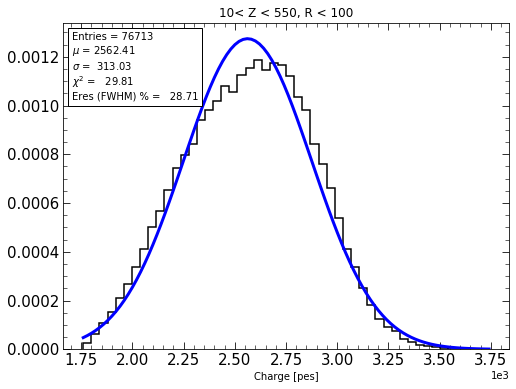

In [7]:
zslice = (10,550)
rcut = 100
for thresh in thresholds[0:1]:
    charge = data[thresh]['charge']
    q_range_fit = data[thresh]['fit_range']
    q_range_plot = data[thresh]['plot_range']
    
    y, b = np.histogram(charge, bins= 1000, 
                            range=[np.min(charge), np.max(charge)])
    x = shift_to_bin_centers(b)
    peak = x[np.argmax(y)]
    fit_range = (peak - np.std(charge)/2.5, peak + np.std(charge)/3)
    fc = fit_energy(charge, nbins=50, range=q_range_fit)
    print_fit_energy(fc)
    plot_fit_energy2(fc, charge, q_range_plot, color='blue')
    plt.xlabel('Charge [pes]')
    plt.title(str(zslice[0])+'< Z < '+str(zslice[1])+', R < '+str(rcut))
    plt.show()

### By hand, fix the fit range to get the best energy resolution for each threshold

plot_range (612.4338357421875, 1915.5242085937502)
amp 79160
max data 1915.5242085937502
A 0.017249514492117493


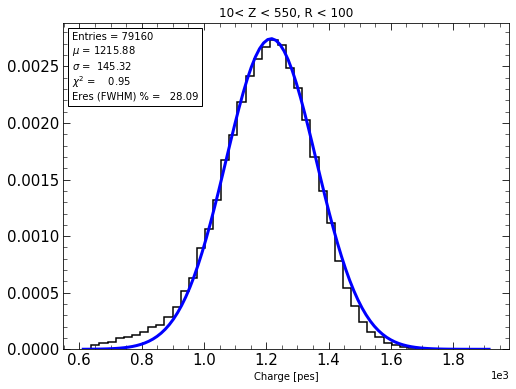

In [296]:
thresh = (0,2)

# Adjust this for best fit
q_range_fit = (1000, 1400) #data[thresh]['fit_range']

charge = data[thresh]['charge']
q_range_plot = data[thresh]['plot_range']

y, b = np.histogram(charge, bins= 1000, 
                        range=[np.min(charge), np.max(charge)])
x = shift_to_bin_centers(b)
peak = x[np.argmax(y)]
fit_range = (peak - np.std(charge)/2.5, peak + np.std(charge)/3)
fc = fit_energy(charge, nbins=50, range=q_range_fit)
#print_fit_energy(fc)
plot_fit_energy2(fc, charge, q_range_plot, color='blue')
plt.xlabel('Charge [pes]')
plt.title(str(zslice[0])+'< Z < '+str(zslice[1])+', R < '+str(rcut))
plt.show()

In [294]:
data[thresh]['fit_range'] = (1000, 1400)

In [316]:
# Save the new fit ranges
fit_ranges = {}
for thresh in data:
    fit_ranges[thresh] = fit_range

In [277]:
fit_ranges = np.array(fit_ranges)

In [341]:
for thresh in thresholds[0:3]:
    charge = data[thresh]['charge']
    q_range_fit1 = (min(charge), max(charge))
    q_range_fit2 = data[thresh]['fit_range']
    print(np.mean(charge), q_range_fit1, q_range_fit2)

2567.4987147394654 (1760.59765625, 3740.8173828125) [1800, 3000]
1453.3699457228213 (762.458740234375, 2518.24853515625) [1000, 2000]
762.6997646797083 (234.444091796875, 1393.1492919921875) [600, 1000]


In [343]:
auto_eres = []
man_eres = []
for thresh in thresholds:
    charge = data[thresh]['charge']
    q_range_fit1 = (min(charge), max(charge))
    q_range_fit2 = data[thresh]['fit_range']
    
    fc1 = fit_energy(charge, nbins=50, range=q_range_fit1)
    auto_eres.append(eres_from_fit(fc1))
    
    fc2 = fit_energy(charge, nbins=50, range=q_range_fit2)
    man_eres.append(eres_from_fit(fc2))
        
    #plot_fit_energy2(fc1, charge, q_range_fit1, color='blue')
    #plt.xlabel('Charge [pes]')
    #plt.title(str(zslice[0])+'< Z < '+str(zslice[1])+', R < '+str(rcut))
    #plt.show()
    
    #plot_fit_energy2(fc2, charge, q_range_fit1, color='red')
    #plt.xlabel('Charge [pes]')
    #plt.title(str(zslice[0])+'< Z < '+str(zslice[1])+', R < '+str(rcut))
    #plt.show()

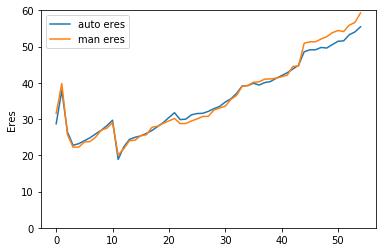

In [345]:
plt.plot(auto_eres, label='auto eres')
plt.plot(man_eres, label='man eres')
plt.ylabel('Eres')
plt.legend()
plt.ylim(0,60)
plt.show()

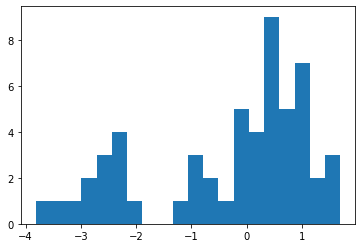

In [346]:
diff_eres = np.array(auto_eres) - np.array(man_eres)
plt.hist(diff_eres, bins=20)
plt.show()

# Get Auto eres

In [17]:
for thresh in thresholds:
    charge = data_wn[thresh]['charge']
    q_range_fit = data_wn[thresh]['fit_range']
    
    fc = fit_energy(charge, nbins=50, range=q_range_fit)
    data_wn[thresh]['eres'] = eres_from_fit(fc) 
    
    charge = data_nsub[thresh]['charge']
    q_range_fit = data_nsub[thresh]['fit_range']
    
    fc = fit_energy(charge, nbins=50, range=q_range_fit)
    data_nsub[thresh]['eres'] = eres_from_fit(fc) 

 fit failed for seed  = GaussPar(mu=Measurement(value=52.52300352160401, uncertainty=9.732183703192591), std=Measurement(value=96.34370329192963, uncertainty=6.917074780988751), amp=Measurement(value=4.57106501828763, uncertainty=17.338535223763436))  due to RunTimeError
 fit failed for seed  = GaussPar(mu=Measurement(value=146.7893254458221, uncertainty=28.19757820683711), std=Measurement(value=135.23083444542516, uncertainty=20.386815361006548), amp=Measurement(value=0.9786538818903852, uncertainty=51.102167813580614))  due to RunTimeError


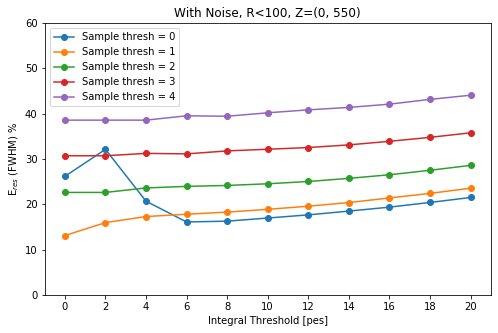

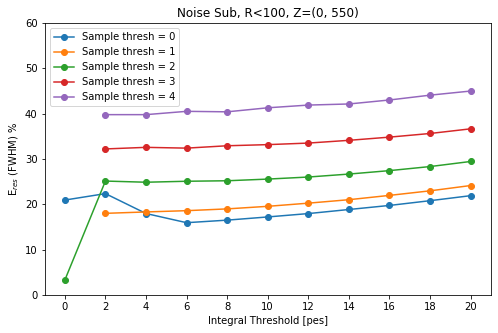

In [28]:
rcut = 100
zrange = (0,550)

samp_thresholds = [0,1,2,3,4]
int_thresholds = np.arange(0,22,2)
fig = plt.figure(figsize=(8,5))
for samp_thresh in samp_thresholds:
    this_eres = []
    this_err = []
    for thresh in thresholds:
        if thresh[0] == samp_thresh:
            this_eres.append(data_wn[thresh]['eres'])
            #this_err.append(data_wn[thresh]['eres_err'])
            
    plt.plot(int_thresholds, this_eres, linestyle='-', marker='o', 
                 label='Sample thresh = '+str(samp_thresh))
plt.xlabel('Integral Threshold [pes]')
plt.ylabel('E$_{res}$ (FWHM) %')
plt.xticks(int_thresholds, int_thresholds)
plt.legend()
plt.ylim(0,60)
plt.title('With Noise, R<'+str(rcut)+', Z='+str(zrange))
plt.show()

samp_thresholds = [0,1,2,3,4]
int_thresholds = np.arange(0,22,2)
fig = plt.figure(figsize=(8,5))
for samp_thresh in samp_thresholds:
    this_eres = []
    this_err = []
    for thresh in thresholds:
        if thresh[0] == samp_thresh:
            this_eres.append(data_nsub[thresh]['eres'])
            #this_err.append(data_nsub[thresh]['eres_err'])
            
    plt.plot(int_thresholds, this_eres, linestyle='-', marker='o', 
                 label='Sample thresh = '+str(samp_thresh))
plt.xlabel('Integral Threshold [pes]')
plt.ylabel('E$_{res}$ (FWHM) %')
plt.xticks(int_thresholds, int_thresholds)
plt.legend()
plt.ylim(0,60)
plt.title('Noise Sub, R<'+str(rcut)+', Z='+str(zrange))
plt.show()

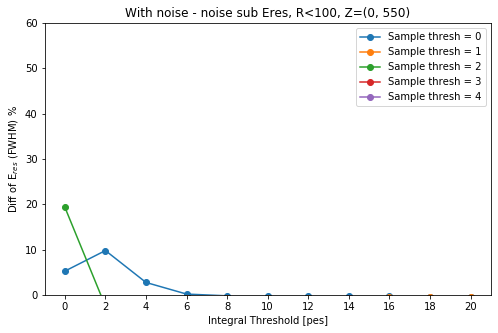

In [33]:
rcut = 100
zrange = (0,550)

samp_thresholds = [0,1,2,3,4]
int_thresholds = np.arange(0,22,2)
fig = plt.figure(figsize=(8,5))
for samp_thresh in samp_thresholds:
    this_eres = []
    this_err = []
    for thresh in thresholds:
        if thresh[0] == samp_thresh:
            if data_wn[thresh]['eres'] != None and data_nsub[thresh]['eres'] != None:
                this_eres.append(data_wn[thresh]['eres'] - data_nsub[thresh]['eres'])
                #this_err.append(data_wn_r20_z100[thresh]['eres_err'])
            else:
                this_eres.append(None)

    plt.plot(int_thresholds, this_eres, linestyle='-', marker='o', 
                 label='Sample thresh = '+str(samp_thresh))
plt.xlabel('Integral Threshold [pes]')
plt.ylabel('Diff of E$_{res}$ (FWHM) %')
plt.xticks(int_thresholds, int_thresholds)
plt.legend()
plt.ylim(0,60)
plt.title('With noise - noise sub Eres, R<'+str(rcut)+', Z='+str(zrange))
plt.show()

In [20]:
for thresh in thresholds:
    charge = data_wn_r20[thresh]['charge']
    q_range_fit = data_wn_r20[thresh]['fit_range']
    
    fc = fit_energy(charge, nbins=50, range=q_range_fit)
    data_wn_r20[thresh]['eres'] = eres_from_fit(fc) 

    charge = data_nsub_r20[thresh]['charge']
    q_range_fit = data_nsub_r20[thresh]['fit_range']

    try:
        fc = fit_energy(charge, nbins=50, range=q_range_fit)
        data_nsub_r20[thresh]['eres'] = eres_from_fit(fc) 
    except:
        data_nsub_r20[thresh]['eres'] = None

 fit failed for seed  = GaussPar(mu=Measurement(value=984.9444567610578, uncertainty=0.8684326352170211), std=Measurement(value=49.73625230618742, uncertainty=0.6141682357093251), amp=Measurement(value=294.03659433981915, uncertainty=1.539491465009231)), due to RunTimeWarning, retry fit 
 fit failed for seed  = GaussPar(mu=Measurement(value=70.23312629394536, uncertainty=31.883197821872592), std=Measurement(value=63.766395643745184, uncertainty=26.032522010601294), amp=Measurement(value=0.2821705575706995, uncertainty=65.25385573172706)), due to RunTimeWarning, retry fit 


/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: divide by zero encountered in double_scalars
/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars
/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: divide by zero encountered in double_scalars
/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars


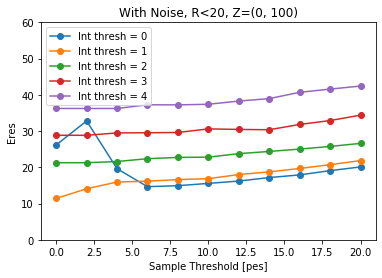

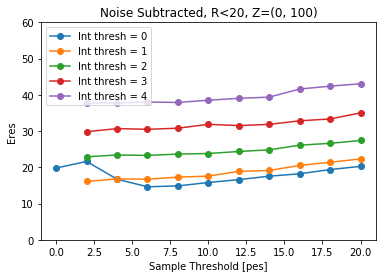

In [21]:
rcut = 20
zrange = (0,550)

samp_thresholds = [0,1,2,3,4]
int_thresholds = np.arange(0,22,2)
fig = plt.figure(figsize=(8,5))
for samp_thresh in samp_thresholds:
    this_eres = []
    this_err = []
    for thresh in thresholds:
        if thresh[0] == samp_thresh:
            this_eres.append(data_wn_r20[thresh]['eres'])
            #this_err.append(data_wn_r20[thresh]['eres_err'])
            
    plt.plot(int_thresholds, this_eres, linestyle='-', marker='o', 
                 label='Sample thresh = '+str(samp_thresh))
plt.xlabel('Integral Threshold [pes]')
plt.ylabel('E$_{res}$ (FWHM) %')
plt.xticks(int_thresholds, int_thresholds)
plt.legend()
plt.ylim(0,60)
plt.title('With Noise, R<'+str(rcut)+', Z='+str(zrange))
plt.show()

samp_thresholds = [0,1,2,3,4]
int_thresholds = np.arange(0,22,2)
fig = plt.figure(figsize=(8,5))
for samp_thresh in samp_thresholds:
    this_eres = []
    this_err = []
    for thresh in thresholds:
        if thresh[0] == samp_thresh:
            this_eres.append(data_nsub_r20[thresh]['eres'])
            #this_err.append(data_nsub_r20[thresh]['eres_err'])
            
    plt.plot(int_thresholds, this_eres, linestyle='-', marker='o', 
                 label='Sample thresh = '+str(samp_thresh))
plt.xlabel('Integral Threshold [pes]')
plt.ylabel('E$_{res}$ (FWHM) %')
plt.xticks(int_thresholds, int_thresholds)
plt.legend()
plt.ylim(0,60)
plt.title('Noise Sub, R<'+str(rcut)+', Z='+str(zrange))
plt.show()

In [22]:
for thresh in thresholds:
    charge = data_wn_r20_z100[thresh]['charge']
    q_range_fit = data_wn_r20_z100[thresh]['fit_range']
    
    try:
        fc = fit_energy(charge, nbins=50, range=q_range_fit)
        data_wn_r20_z100[thresh]['eres'] = eres_from_fit(fc) 
    except:
        data_wn_r20_z100[thresh]['eres'] = None
    
    charge = data_nsub_r20_z100[thresh]['charge']
    q_range_fit = data_nsub_r20_z100[thresh]['fit_range']

    try:
        fc = fit_energy(charge, nbins=50, range=q_range_fit)
        data_nsub_r20_z100[thresh]['eres'] = eres_from_fit(fc) 
    except:
        data_nsub_r20_z100[thresh]['eres'] = None

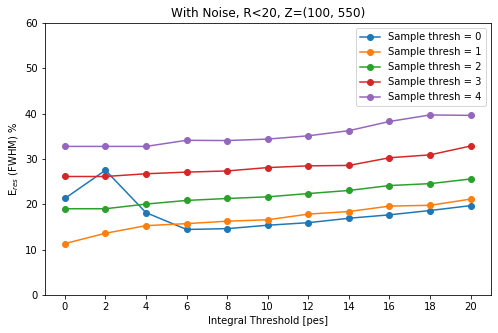

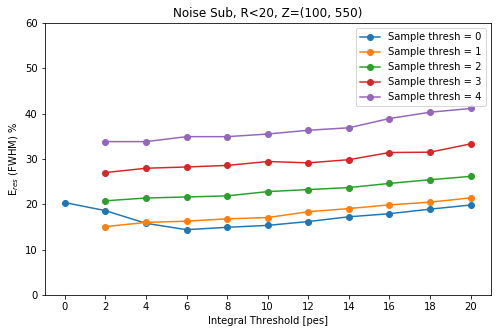

In [27]:
rcut = 20
zrange = (100,550)

samp_thresholds = [0,1,2,3,4]
int_thresholds = np.arange(0,22,2)
fig = plt.figure(figsize=(8,5))
for samp_thresh in samp_thresholds:
    this_eres = []
    this_err = []
    for thresh in thresholds:
        if thresh[0] == samp_thresh:
            this_eres.append(data_wn_r20_z100[thresh]['eres'])
            #this_err.append(data_wn_r20_z100[thresh]['eres_err'])
            
    plt.plot(int_thresholds, this_eres, linestyle='-', marker='o', 
                 label='Sample thresh = '+str(samp_thresh))
plt.xlabel('Integral Threshold [pes]')
plt.ylabel('E$_{res}$ (FWHM) %')
plt.xticks(int_thresholds, int_thresholds)
plt.legend()
plt.ylim(0,60)
plt.title('With Noise, R<'+str(rcut)+', Z='+str(zrange))
plt.show()

samp_thresholds = [0,1,2,3,4]
int_thresholds = np.arange(0,22,2)
fig = plt.figure(figsize=(8,5))
for samp_thresh in samp_thresholds:
    this_eres = []
    this_err = []
    for thresh in thresholds:
        if thresh[0] == samp_thresh:
            this_eres.append(data_nsub_r20_z100[thresh]['eres'])
            #this_err.append(data_nsub_r20_z100_geo[thresh]['eres_err'])
            
    plt.plot(int_thresholds, this_eres, linestyle='-', marker='o', 
                 label='Sample thresh = '+str(samp_thresh))
plt.xlabel('Integral Threshold [pes]')
plt.ylabel('E$_{res}$ (FWHM) %')
plt.xticks(int_thresholds, int_thresholds)
plt.legend()
plt.ylim(0,60)
plt.title('Noise Sub, R<'+str(rcut)+', Z='+str(zrange))
plt.show()

In [24]:
for thresh in thresholds:
    charge = data_wn_r20_z100_geo[thresh]['charge']
    q_range_fit = data_wn_r20_z100_geo[thresh]['fit_range']
    
    try:
        fc = fit_energy(charge, nbins=50, range=q_range_fit)
        r, err, _, _, _ = eres_err(fc)
        data_wn_r20_z100_geo[thresh]['eres'] = r
        data_wn_r20_z100_geo[thresh]['eres_err'] = err
    except:
        data_wn_r20_z100_geo[thresh]['eres'] = None
    
    charge = data_nsub_r20_z100_geo[thresh]['charge']
    q_range_fit = data_nsub_r20_z100_geo[thresh]['fit_range']
    
    try:
        fc = fit_energy(charge, nbins=50, range=q_range_fit)
        r, err, _, _, _ = eres_err(fc)
        data_nsub_r20_z100_geo[thresh]['eres'] = r
        data_nsub_r20_z100_geo[thresh]['eres_err'] = err
    except:
        data_nsub_r20_z100_geo[thresh]['eres'] = None
    if r < 0:
        data_nsub_r20_z100_geo[thresh]['eres'] = None

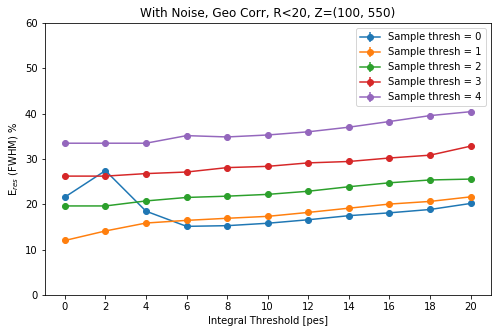

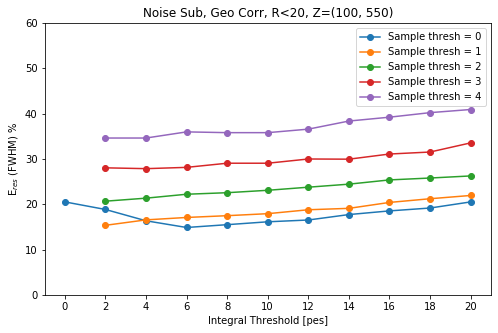

In [25]:
rcut = 20
zrange = (100,550)

samp_thresholds = [0,1,2,3,4]
int_thresholds = np.arange(0,22,2)
fig = plt.figure(figsize=(8,5))
for samp_thresh in samp_thresholds:
    this_eres = []
    this_err = []
    for thresh in thresholds:
        if thresh[0] == samp_thresh:
            this_eres.append(data_wn_r20_z100_geo[thresh]['eres'])
            this_err.append(data_wn_r20_z100_geo[thresh]['eres_err'])
            
    plt.errorbar(int_thresholds, this_eres, yerr=this_err, linestyle='-', marker='o', 
                 label='Sample thresh = '+str(samp_thresh))
plt.xlabel('Integral Threshold [pes]')
plt.ylabel('E$_{res}$ (FWHM) %')
plt.xticks(int_thresholds, int_thresholds)
plt.legend()
plt.ylim(0,60)
plt.title('With Noise, Geo Corr, R<'+str(rcut)+', Z='+str(zrange))
plt.show()

samp_thresholds = [0,1,2,3,4]
int_thresholds = np.arange(0,22,2)
fig = plt.figure(figsize=(8,5))
for samp_thresh in samp_thresholds:
    this_eres = []
    this_err = []
    for thresh in thresholds:
        if thresh[0] == samp_thresh:
            this_eres.append(data_nsub_r20_z100_geo[thresh]['eres'])
            #this_err.append(data_nsub_r20_z100_geo[thresh]['eres_err'])
            
    plt.plot(int_thresholds, this_eres, linestyle='-', marker='o', 
                 label='Sample thresh = '+str(samp_thresh))
plt.xlabel('Integral Threshold [pes]')
plt.ylabel('E$_{res}$ (FWHM) %')
plt.xticks(int_thresholds, int_thresholds)
plt.legend()
plt.ylim(0,60)
plt.title('Noise Sub, Geo Corr, R<'+str(rcut)+', Z='+str(zrange))
plt.show()

In [45]:
data_nsub_r20_z100_geo[(1,6)]['eres']

17.072301035742246

## Checking individual thresholds
Wanted to make sure I can get the same 15% like I did in the previous analysis

  Fit was valid = True
 Emu       = 586.9805729918826 +-1.530294550337917 
 E sigma   = 61.04954570130413 +-1.2998020020198096 
 chi2    = 0.8847219627333783 
 sigma E/E (FWHM)     (%) =24.44142770633888
 sigma E/E (FWHM) Qbb (%) =3.156658204115961 
plot_range (0, 1000)
amp 3282
max data 806.2208064453125
A 0.041058917733722854


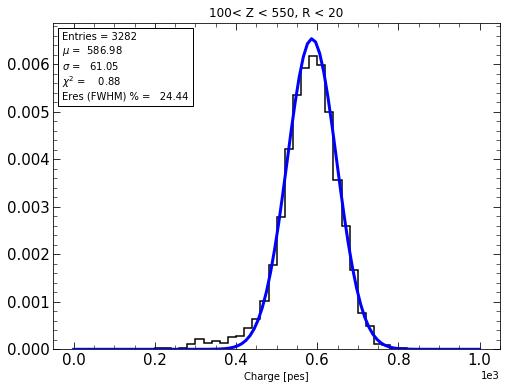

In [419]:
rcut = 20
charge = data_nsub_r20[(1,4)]['charge']
q_range_fit = (500,800)
#q_range_fit = (800,1200)
q_range_plot = (0,1000)
zslice = (100,550)
y, b = np.histogram(charge, bins= 1000, 
                        range=[np.min(charge), np.max(charge)])
x = shift_to_bin_centers(b)
peak = x[np.argmax(y)]
fit_range = (peak - np.std(charge)/2.5, peak + np.std(charge)/3)
fc = fit_energy(charge, nbins=50, range=q_range_fit)
print_fit_energy(fc)
plot_fit_energy2(fc, charge, q_range_plot, color='blue')
plt.xlabel('Charge [pes]')
plt.title(str(zslice[0])+'< Z < '+str(zslice[1])+', R < '+str(rcut))
plt.show()

  Fit was valid = True
 Emu       = 606.3768361238516 +-1.2711079223805875 
 E sigma   = 59.780940949573996 +-1.0624555408648404 
 chi2    = 0.7451959396391357 
 sigma E/E (FWHM)     (%) =23.16797127831001
 sigma E/E (FWHM) Qbb (%) =2.992188815117094 
plot_range (0, 1000)
amp 3282
max data 834.0222778320312
A 0.04193022449655608


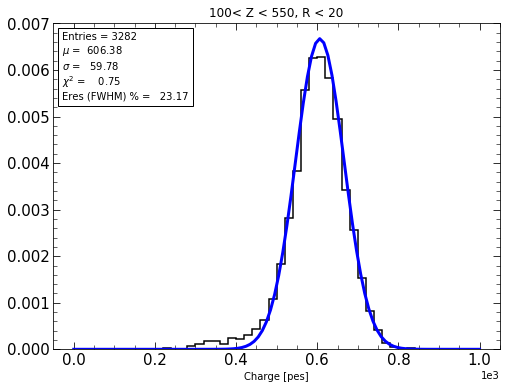

In [422]:
rcut = 20
charge = data_wn_r20[(1,4)]['charge']
q_range_fit = (500,800)
#q_range_fit = (800,1200)
q_range_plot = (0,1000)
zslice = (100,550)
y, b = np.histogram(charge, bins= 1000, 
                        range=[np.min(charge), np.max(charge)])
x = shift_to_bin_centers(b)
peak = x[np.argmax(y)]
fit_range = (peak - np.std(charge)/2.5, peak + np.std(charge)/3)
fc = fit_energy(charge, nbins=50, range=q_range_fit)
print_fit_energy(fc)
plot_fit_energy2(fc, charge, q_range_plot, color='blue')
plt.xlabel('Charge [pes]')
plt.title(str(zslice[0])+'< Z < '+str(zslice[1])+', R < '+str(rcut))
plt.show()

  Fit was valid = True
 Emu       = 580.7466754988083 +-1.6023866259881756 
 E sigma   = 57.238693940274246 +-1.310017726315957 
 chi2    = 1.118381969982042 
 sigma E/E (FWHM)     (%) =23.161722044144614
 sigma E/E (FWHM) Qbb (%) =2.991381714298981 
plot_range (0, 1000)
amp 2771
max data 804.3870778320313
A 0.04379254839823116


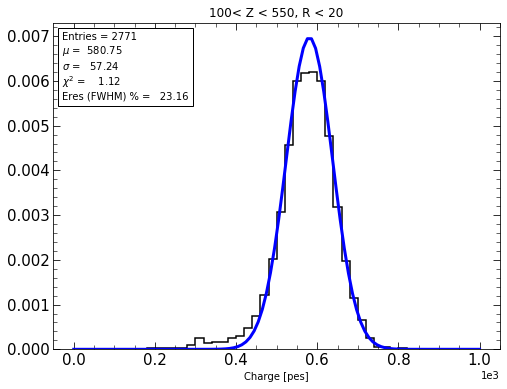

In [430]:
rcut = 20
charge = data_nsub_r20_z100[(1,4)]['charge']
q_range_fit = (500,800)
#q_range_fit = (800,1200)
q_range_plot = (0,1000)
zslice = (100,550)
y, b = np.histogram(charge, bins= 1000, 
                        range=[np.min(charge), np.max(charge)])
x = shift_to_bin_centers(b)
peak = x[np.argmax(y)]
fit_range = (peak - np.std(charge)/2.5, peak + np.std(charge)/3)
fc = fit_energy(charge, nbins=50, range=q_range_fit)
print_fit_energy(fc)
plot_fit_energy2(fc, charge, q_range_plot, color='blue')
plt.xlabel('Charge [pes]')
plt.title(str(zslice[0])+'< Z < '+str(zslice[1])+', R < '+str(rcut))
plt.show()

  Fit was valid = True
 Emu       = 619.590951156129 +-1.3952091948282246 
 E sigma   = 62.408265843442045 +-1.1752715775285119 
 chi2    = 1.0313192218672278 
 sigma E/E (FWHM)     (%) =23.67036259300251
 sigma E/E (FWHM) Qbb (%) =3.0570736362599025 
plot_range (0, 1000)
amp 2771
max data 863.2963180447416
A 0.04016500443898171


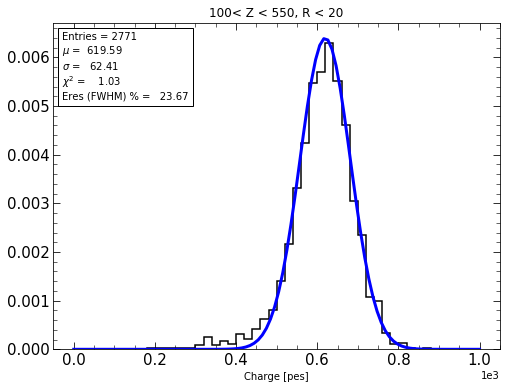

In [438]:
rcut = 20
charge = data_nsub_r20_z100_geo[(1,4)]['charge']
q_range_fit = (500,800)
#q_range_fit = (800,1200)
q_range_plot = (0,1000)
zslice = (100,550)
y, b = np.histogram(charge, bins= 1000, 
                        range=[np.min(charge), np.max(charge)])
x = shift_to_bin_centers(b)
peak = x[np.argmax(y)]
fit_range = (peak - np.std(charge)/2.5, peak + np.std(charge)/3)
fc = fit_energy(charge, nbins=50, range=q_range_fit)
print_fit_energy(fc)
plot_fit_energy2(fc, charge, q_range_plot, color='blue')
plt.xlabel('Charge [pes]')
plt.title(str(zslice[0])+'< Z < '+str(zslice[1])+', R < '+str(rcut))
plt.show()

  Fit was valid = True
 Emu       = 656.2922090571241 +-0.8468879390259904 
 E sigma   = 43.36785766847887 +-0.6229657948840924 
 chi2    = 1.1810588573104985 
 sigma E/E (FWHM)     (%) =15.528824525792086
 sigma E/E (FWHM) Qbb (%) =2.0055780672299113 
plot_range (0, 1000)
amp 2775
max data 991.9099180057287
A 0.057799218347206874


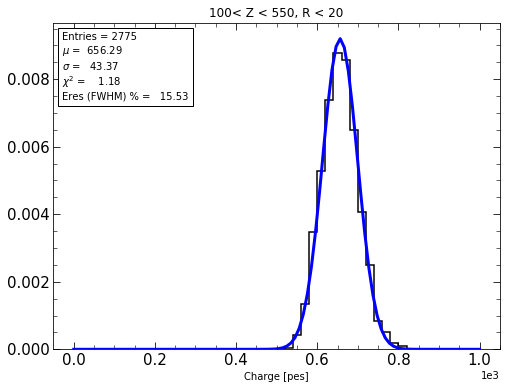

In [448]:
rcut = 20
charge = data_wn_r20_z100_geo[(1,4)]['charge']
q_range_fit = (500,800)
#q_range_fit = (800,1200)
q_range_plot = (0,1000)
zslice = (100,550)
y, b = np.histogram(charge, bins= 1000, 
                        range=[np.min(charge), np.max(charge)])
x = shift_to_bin_centers(b)
peak = x[np.argmax(y)]
fit_range = (peak - np.std(charge)/2.5, peak + np.std(charge)/3)
fc = fit_energy(charge, nbins=50, range=q_range_fit)
print_fit_energy(fc)
plot_fit_energy2(fc, charge, q_range_plot, color='blue')
plt.xlabel('Charge [pes]')
plt.title(str(zslice[0])+'< Z < '+str(zslice[1])+', R < '+str(rcut))
plt.show()

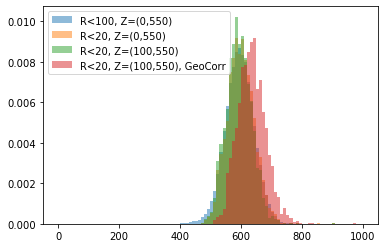

In [455]:
# Compare different correction/cuts
plt.hist(data_nsub[(1,4)]['charge'], label='R<100, Z=(0,550)', bins=100, range=(0,1000), alpha=0.5, density=True)
plt.hist(data_nsub_r20[(1,4)]['charge'], label='R<20, Z=(0,550)', bins=100, range=(0,1000), alpha=0.5, density=True)
plt.hist(data_nsub_r20_z100[(1,4)]['charge'], label='R<20, Z=(100,550)', bins=100, range=(0,1000), alpha=0.5, density=True)
plt.hist(data_nsub_r20_z100_geo[(1,4)]['charge'], label='R<20, Z=(100,550), GeoCorr', bins=100, range=(0,1000), alpha=0.5, density=True)
plt.legend()
plt.show()


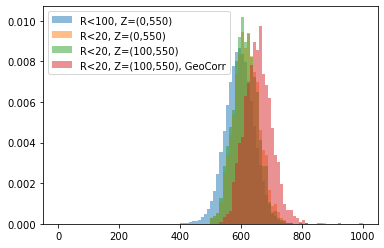

In [454]:
# Compare different correction/cuts
plt.hist(data_nsub[(1,4)]['charge'], label='R<100, Z=(0,550)', bins=100, range=(0,1000), alpha=0.5, density=True)
plt.hist(data_wn_r20[(1,4)]['charge'], label='R<20, Z=(0,550)', bins=100, range=(0,1000), alpha=0.5, density=True)
plt.hist(data_wn_r20_z100[(1,4)]['charge'], label='R<20, Z=(100,550)', bins=100, range=(0,1000), alpha=0.5, density=True)
plt.hist(data_wn_r20_z100_geo[(1,4)]['charge'], label='R<20, Z=(100,550), GeoCorr', bins=100, range=(0,1000), alpha=0.5, density=True)
plt.legend()
plt.show()

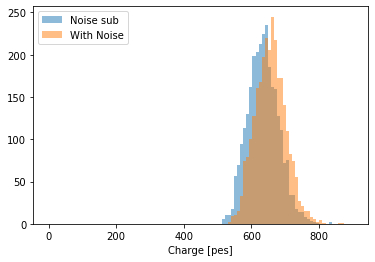

In [480]:
plt.hist(data_nsub_r20_z100_geo[(1,4)]['charge'], label='Noise sub', bins=100, range=(0,900), alpha=0.5)
plt.hist(data_wn_r20_z100_geo[(1,4)]['charge'], label='With Noise', bins=100, range=(0,900), alpha=0.5)
plt.legend()
plt.xlabel('Charge [pes]')
plt.show()


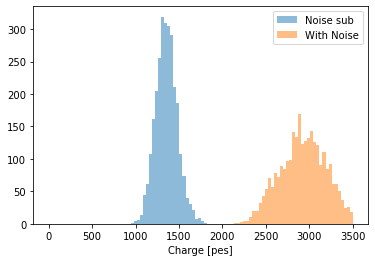

In [499]:
plt.hist(data_nsub_r20_z100_geo[(0,0)]['charge'], label='Noise sub', bins=100, range=(0,3500), alpha=0.5)
plt.hist(data_wn_r20_z100_geo[(0,0)]['charge'], label='With Noise', bins=100, range=(0,3500), alpha=0.5)
plt.legend()
plt.xlabel('Charge [pes]')
plt.show()

  Fit was valid = True
 Emu       = 2933.5011520886783 +-5.26367598742199 
 E sigma   = 269.2247844735883 +-3.775516591367483 
 chi2    = 1.4278626362892994 
 sigma E/E (FWHM)     (%) =21.567342595466855
 sigma E/E (FWHM) Qbb (%) =2.7854644893474596 
plot_range (0, 3800)
amp 2760
max data 3864.3062707424824
A 0.00931054055640597


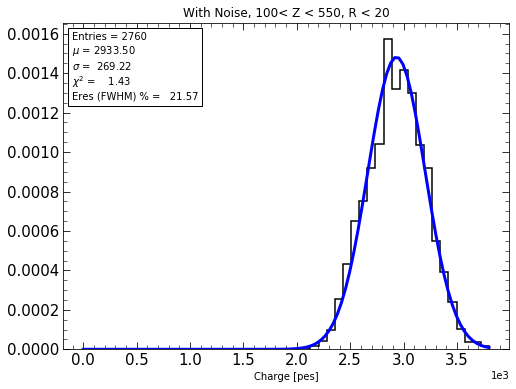

  Fit was valid = True
 Emu       = 1354.2423422715397 +-2.2996813416856807 
 E sigma   = 118.19036274442813 +-1.6804814278244307 
 chi2    = 1.2759320519797088 
 sigma E/E (FWHM)     (%) =20.509427580260585
 sigma E/E (FWHM) Qbb (%) =2.648832695487797 
plot_range (0, 3800)
amp 2774
max data 1805.2184655888364
A 0.021208398184302642


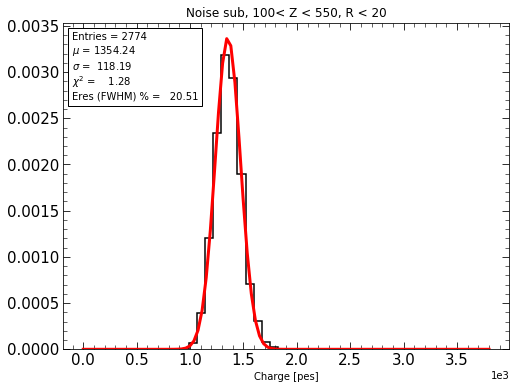

In [502]:
rcut = 20
charge = data_wn_r20_z100_geo[(0,0)]['charge']
q_range_fit = data_wn_r20_z100_geo[(0,0)]['fit_range']
#q_range_fit = (800,1200)
q_range_plot = (0,3800) #data_wn_r20_z100_geo[(0,0)]['fit_range']
zslice = (100,550)
y, b = np.histogram(charge, bins= 1000, 
                        range=[np.min(charge), np.max(charge)])
x = shift_to_bin_centers(b)
peak = x[np.argmax(y)]
fit_range = (peak - np.std(charge)/2.5, peak + np.std(charge)/3)
fc = fit_energy(charge, nbins=50, range=q_range_fit)
print_fit_energy(fc)
plot_fit_energy2(fc, charge, q_range_plot, color='blue')
plt.xlabel('Charge [pes]')
plt.title('With Noise, ' +str(zslice[0])+'< Z < '+str(zslice[1])+', R < '+str(rcut))
plt.show()

charge = data_nsub_r20_z100_geo[(0,0)]['charge']
q_range_fit = data_nsub_r20_z100_geo[(0,0)]['fit_range']
y, b = np.histogram(charge, bins= 1000, 
                        range=[np.min(charge), np.max(charge)])
x = shift_to_bin_centers(b)
peak = x[np.argmax(y)]
fit_range = (peak - np.std(charge)/2.5, peak + np.std(charge)/3)
fc = fit_energy(charge, nbins=50, range=q_range_fit)
print_fit_energy(fc)
plot_fit_energy2(fc, charge, q_range_plot, color='red')
plt.xlabel('Charge [pes]')
plt.title('Noise sub, '+str(zslice[0])+'< Z < '+str(zslice[1])+', R < '+str(rcut))
plt.show()

  Fit was valid = True
 Emu       = 1049.5969954937323 +-1.043868350509741 
 E sigma   = 53.44387592489213 +-0.7576157782006596 
 chi2    = 1.0777431315836028 
 sigma E/E (FWHM)     (%) =11.9658410764045
 sigma E/E (FWHM) Qbb (%) =1.5454117843199418 
plot_range (0, 1500)
amp 2775
max data 1445.1935804835985
A 0.046902067472683204


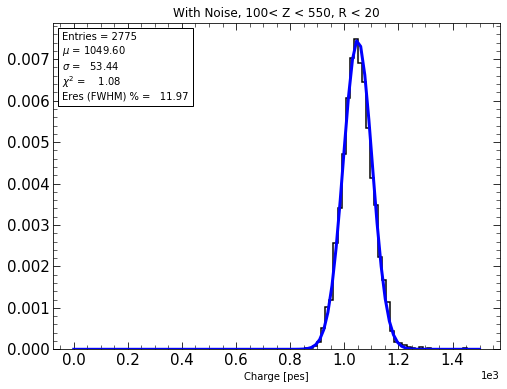

In [49]:
rcut = 20
zrange = (100,550)
thresh = (1,0)
charge = data_wn_r20_z100_geo[thresh]['charge']
q_range_fit = data_wn_r20_z100_geo[thresh]['fit_range']
#q_range_fit = (800,1200)
q_range_plot = (0,1500) #data_wn_r20_z100_geo[(0,0)]['fit_range']
zslice = (100,550)
y, b = np.histogram(charge, bins= 1000, 
                        range=[np.min(charge), np.max(charge)])
x = shift_to_bin_centers(b)
peak = x[np.argmax(y)]
fit_range = (peak - np.std(charge)/2.5, peak + np.std(charge)/3)
fc = fit_energy(charge, nbins=100, range=q_range_fit)
print_fit_energy(fc)
plot_fit_energy2(fc, charge, q_range_plot, color='blue')
plt.xlabel('Charge [pes]')
plt.title('With Noise, ' +str(zslice[0])+'< Z < '+str(zslice[1])+', R < '+str(rcut))
plt.show()

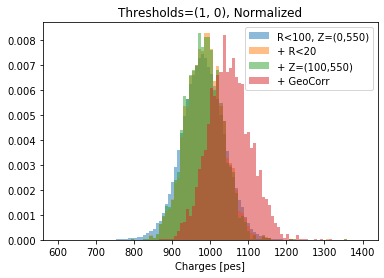

In [61]:
# Compare different correction/cuts
thresh = (1,0)
q_range = (600,1400)
plt.hist(data_wn[thresh]['charge'], label='R<100, Z=(0,550)', bins=100, 
         range=q_range, alpha=0.5, density=True)
plt.hist(data_wn_r20[thresh]['charge'], label='+ R<20', bins=100, 
         range=q_range, alpha=0.5, density=True)
plt.hist(data_wn_r20_z100[thresh]['charge'], label='+ Z=(100,550)', bins=100, 
         range=q_range, alpha=0.5, density=True)
plt.hist(data_wn_r20_z100_geo[thresh]['charge'], label='+ GeoCorr', bins=100, 
         range=q_range, alpha=0.5, density=True)
plt.legend()
plt.xlabel('Charges [pes]')
plt.title('Thresholds='+str(thresh)+', Normalized')
plt.show()

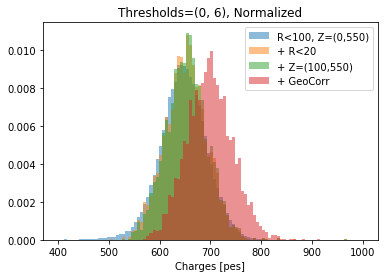

In [69]:
# Compare different correction/cuts
thresh = (0,6)
q_range = (400,1000)
plt.hist(data_wn[thresh]['charge'], label='R<100, Z=(0,550)', bins=100, 
         range=q_range, alpha=0.5, density=True)
plt.hist(data_wn_r20[thresh]['charge'], label='+ R<20', bins=100, 
         range=q_range, alpha=0.5, density=True)
plt.hist(data_wn_r20_z100[thresh]['charge'], label='+ Z=(100,550)', bins=100, 
         range=q_range, alpha=0.5, density=True)
plt.hist(data_wn_r20_z100_geo[thresh]['charge'], label='+ GeoCorr', bins=100, 
         range=q_range, alpha=0.5, density=True)
plt.legend()
plt.xlabel('Charges [pes]')
plt.title('Thresholds='+str(thresh)+', Normalized')
plt.show()

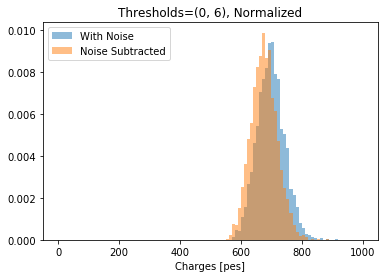

In [70]:
thresh = (0,6)
q_range = (0,1000)
plt.hist(data_wn_r20_z100_geo[thresh]['charge'], label='With Noise', bins=100, 
         range=q_range, alpha=0.5, density=True)
plt.hist(data_nsub_r20_z100_geo[thresh]['charge'], label='Noise Subtracted', bins=100, 
         range=q_range, alpha=0.5, density=True)
plt.legend()
plt.xlabel('Charges [pes]')
plt.title('Thresholds='+str(thresh)+', Normalized')
plt.show()

In [81]:
data_wn_r20_z100_geo[(1,0)]['eres'], data_nsub_r20_z100_geo[(0,0)]['eres']

(11.98935495629295, 20.509427580260585)

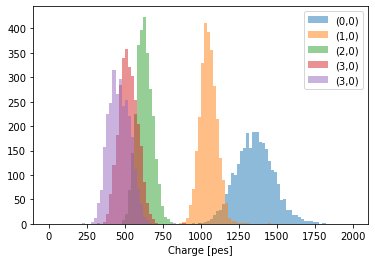

In [98]:
plt.hist(data_nsub_r20_z100_geo[(0,0)]['charge'], bins=100, label='(0,0)', range=(0,2000), alpha=.5)
plt.hist(data_wn_r20_z100_geo[(1,0)]['charge'], bins=100, label='(1,0)', range=(0,2000), alpha=.5)
plt.hist(data_wn_r20_z100_geo[(2,0)]['charge'], bins=100, label='(2,0)', range=(0,2000), alpha=.5)
plt.hist(data_wn_r20_z100_geo[(3,0)]['charge'], bins=100, label='(3,0)', range=(0,2000), alpha=.5)
plt.hist(data_wn_r20_z100_geo[(4,0)]['charge'], bins=100, label='(4,0)', range=(0,2000), alpha=.5)

plt.legend()
plt.xlabel('Charge [pes]')
plt.show()


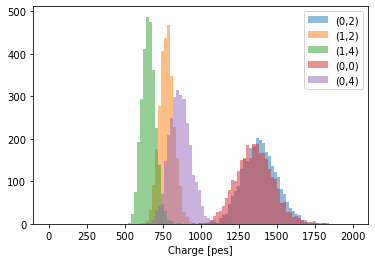

In [104]:
plt.hist(data_nsub_r20_z100_geo[(0,2)]['charge'], bins=100, label='(0,2)', range=(0,2000), alpha=.5)
plt.hist(data_wn_r20_z100_geo[(1,2)]['charge'], bins=100, label='(1,2)', range=(0,2000), alpha=.5)
plt.hist(data_wn_r20_z100_geo[(1,4)]['charge'], bins=100, label='(1,4)', range=(0,2000), alpha=.5)
plt.hist(data_nsub_r20_z100_geo[(0,0)]['charge'], bins=100, label='(0,0)', range=(0,2000), alpha=.5)
plt.hist(data_wn_r20_z100_geo[(0,4)]['charge'], bins=100, label='(0,4)', range=(0,2000), alpha=.5)

plt.legend()
plt.xlabel('Charge [pes]')
plt.show()

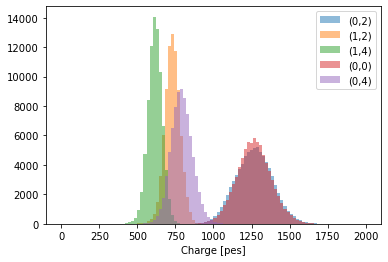

In [115]:
plt.hist(data_nsub[(0,2)]['charge'], bins=100, label='(0,2)', range=(0,2000), alpha=.5)
plt.hist(data_wn[(1,2)]['charge'], bins=100, label='(1,2)', range=(0,2000), alpha=.5)
plt.hist(data_wn[(1,4)]['charge'], bins=100, label='(1,4)', range=(0,2000), alpha=.5)
plt.hist(data_nsub[(0,0)]['charge'], bins=100, label='(0,0)', range=(0,2000), alpha=.5)
plt.hist(data_wn[(0,4)]['charge'], bins=100, label='(0,4)', range=(0,2000), alpha=.5)

plt.legend()
plt.xlabel('Charge [pes]')
plt.show()

In [94]:
data_wn_r20_z100_geo[(2,0)]['eres'], data_wn_r20_z100_geo[(0,0)]['eres']

(19.614001504544593, 21.567342595466855)

In [95]:
data_wn_r20_z100_geo[(1,0)]['eres']

11.98935495629295

In [114]:
68.6 * 1e-3 * 15

1.029

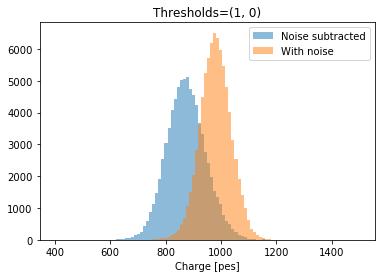

In [19]:
thresh = thresholds[11]
plt.hist(charge_test, bins=100, range=(400,1500), label='Noise subtracted', alpha=0.5)
plt.hist(data_wn[thresh]['charge'], bins=100, range=(400,1500), label='With noise', alpha=0.5)
plt.xlabel('Charge [pes]')
plt.legend()
plt.title('Thresholds='+str(thresh))
plt.show()

  Fit was valid = True
 Emu       = 874.5910337192084 +-0.25134569278636165 
 E sigma   = 69.28102356820345 +-0.19183437486541427 
 chi2    = 15.253818751829451 
 sigma E/E (FWHM)     (%) =18.61560422051493
 sigma E/E (FWHM) Qbb (%) =2.404241703606535 
plot_range (400, 1300)
amp 79478
max data 1347.8287570655
A 0.03618058951111424


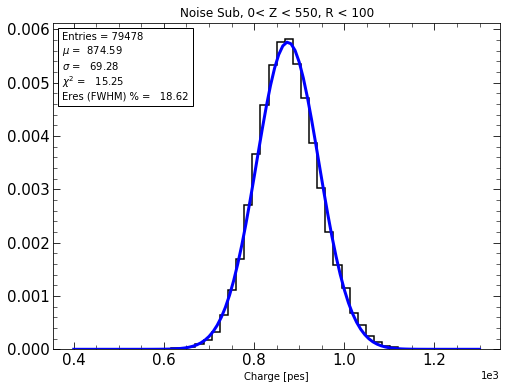

  Fit was valid = True
 Emu       = 980.6717650454348 +-0.19596652477408796 
 E sigma   = 54.60458104937857 +-0.14694492964532033 
 chi2    = 4.647070183693764 
 sigma E/E (FWHM)     (%) =13.084986234929941
 sigma E/E (FWHM) Qbb (%) =1.6899515709765032 
plot_range (400, 1300)
amp 79480
max data 1441.5726318359375
A 0.04590509122969504


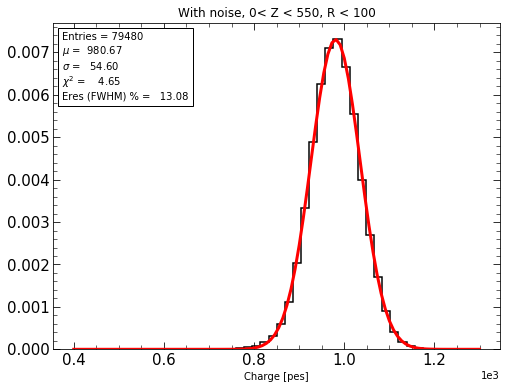

In [24]:
rcut = 100
charge = charge_test
q_range_fit = (min(charge_test), max(charge_test))
#q_range_fit = (800,1200)
q_range_plot = (400,1300) #data_wn_r20_z100_geo[(0,0)]['fit_range']
zslice = (0,550)
y, b = np.histogram(charge, bins= 1000, 
                        range=[np.min(charge), np.max(charge)])
x = shift_to_bin_centers(b)
peak = x[np.argmax(y)]
fit_range = (peak - np.std(charge)/2.5, peak + np.std(charge)/3)
fc = fit_energy(charge, nbins=50, range=q_range_fit)
print_fit_energy(fc)
plot_fit_energy2(fc, charge, q_range_plot, color='blue')
plt.xlabel('Charge [pes]')
plt.title('Noise Sub, ' +str(zslice[0])+'< Z < '+str(zslice[1])+', R < '+str(rcut))
plt.show()

charge = data_wn[thresh]['charge']
q_range_fit = data_wn[thresh]['fit_range']
y, b = np.histogram(charge, bins= 1000, 
                        range=[np.min(charge), np.max(charge)])
x = shift_to_bin_centers(b)
peak = x[np.argmax(y)]
fit_range = (peak - np.std(charge)/2.5, peak + np.std(charge)/3)
fc = fit_energy(charge, nbins=50, range=q_range_fit)
print_fit_energy(fc)
plot_fit_energy2(fc, charge, q_range_plot, color='red')
plt.xlabel('Charge [pes]')
plt.title('With noise, '+str(zslice[0])+'< Z < '+str(zslice[1])+', R < '+str(rcut))
plt.show()